In [170]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [171]:
product = 'rgpf'

In [172]:
list_files = glob.glob('/mnt/Data/Data/PF/'+product+'/*.HDF')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

85 files found


['/mnt/Data/Data/PF/rgpf/pf_201403_level2.HDF',
 '/mnt/Data/Data/PF/rgpf/pf_201404_level2.HDF']

In [173]:
file_input = list_files[0]
print(file_input)

/mnt/Data/Data/PF/rgpf/pf_201403_level2.HDF


In [174]:
data = ca.read_netcdf(file_input,1)
lat = data['LAT'].data
lon = data['LON'].data

list_var = ['NPIXELS_30DBZ', 'NPIXELS_40DBZ', 'NPIXELS_50DBZ', 
            'NPIXELS_30MM', 'NPIXELS_40MM', 'NPIXELS_50MM', 
            'NSNOWPIXELS_KU', 'NSNOWPIXELS_GMI', 
            'NSTRAT_KU', 'NCONV_KU', 
            'MIN85PCT',
            'MAXHT40']

list_description = ['Number of radar pixels with 30 dBZ',
                    'Number of radar pixels with 40 dBZ',
                    'Number of radar pixels with 50 dBZ',
                    'Number of radar pixels with precipitation greater than 30 mm',
                    'Number of radar pixels with precipitation greater than 40 mm',
                    'Number of radar pixels with precipitation greater than 50 mm',
                    'Number of Ku pixels with snowfall',
                    'Number of GMI pixels with snowfall',
                    'Number of stratiform pixels with Ku-band',
                    'Number of convective pixels with Ku-band',
                    'Minimum 89 GHz polarization correction TB (K)',
                    'Maximum height with 40 dBZ echo (km)']

data_in = np.zeros([len(lat),len(list_var)])

for t in range(len(list_var)):
    data_in[:,t] = data[list_var[t]].data

Number of variables:  125


In [175]:
pd_in = pd.DataFrame(data_in, columns=list_var)
pd_in.insert(0, "lat", lat, True)
pd_in.insert(1, "lon", lon, True)
pd_in.head(5)

,lat,lon,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_30MM,NPIXELS_40MM,NPIXELS_50MM,NSNOWPIXELS_KU,NSNOWPIXELS_GMI,NSTRAT_KU,NCONV_KU,MIN85PCT,MAXHT40
0,-66.021301,159.750656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,245.419128,0.0
1,-65.550476,159.784210,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,241.998718,0.0
2,-64.311798,160.216705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,257.971771,0.0
3,-65.298126,160.061249,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,266.264771,0.0
4,-64.726440,160.333908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,263.436157,0.0


In [176]:
# South America Region
out1 = pd_in[(pd_in['lon'] > -85) & (pd_in['lon'] < -30 )]
out2 = out1[(out1['lat'] > -45) & (out1['lat'] < 15 )]

In [177]:
# export dataframe to csv
salida = '/mnt/Data/Data/PF/DF_SA/' + file_input.split('/')[-1].replace('.HDF','.csv').replace('pf',product)
print(f'Exporting data to {salida}')
out2.to_csv(salida,header=True,index=False)

Exporting data to /mnt/Data/Data/PF/DF_SA/rgpf_201403_level2.csv


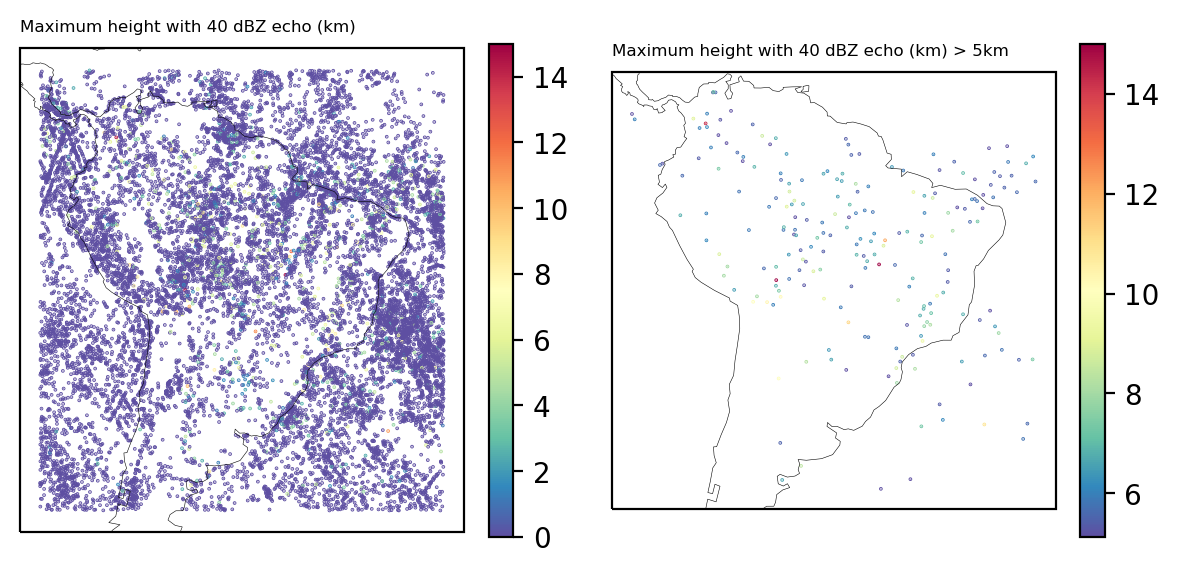

In [178]:
alt_ref = 5

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

levels = np.arange(0,15,3)

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'],out2['lat'],c=out2['MAXHT40'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'][out2['MAXHT40']>alt_ref],out2['lat'][out2['MAXHT40']>alt_ref],c=out2['MAXHT40'][out2['MAXHT40']>alt_ref],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)